In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as npn
import scanpy.external as sce
import numpy as np
import omicverse as ov


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.6, Tutorials: https://omicverse.readthedocs.io/


In [3]:
# import palantir
# import scGAM

In [4]:
# plt.rcParams['font.family'] = "sans-serif"

In [5]:
sc.settings.verbosity = 3  
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

-----
anndata     0.10.9
scanpy      1.10.2
-----
PIL                 10.2.0
absl                NA
asttokens           NA
autograd            NA
autograd_gamma      NA
backports           NA
boltons             NA
bs4                 4.12.3
certifi             2024.08.30
cffi                1.17.1
charset_normalizer  3.3.2
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.5
decorator           5.1.1
dill                0.3.8
exceptiongroup      1.2.2
executing           2.1.0
filelock            3.13.1
fontTools           4.53.1
formulaic           1.0.2
fsspec              2024.2.0
gdown               5.2.0
google              NA
graphlib            NA
h5py                3.11.0
idna                3.9
igraph              0.11.6
interface_meta      1.3.0
ipykernel           6.29.5
ipywidgets          8.1.5
jaraco              NA
jedi                0.19.1
jinja2              3.

In [6]:
samples_dict = {"CTR": "CTR", "AAV": "AAV"}

In [7]:
# the cell cyle gene extracted from seurat (cc.genes)
s_genes = list(pd.read_csv("./csv/s_genes.csv")["V2"])
g2m_genes = list(pd.read_csv("./csv/g2m_genes.csv")["V2"])
print(s_genes)
print(g2m_genes)

['Mcm5', 'Pcna', 'Tyms', 'Fen1', 'Mcm7', 'Mcm4', 'Rrm1', 'Ung', 'Gins2', 'Mcm6', 'Cdca7', 'Dtl', 'Prim1', 'Uhrf1', 'Cenpu', 'Hells', 'Rfc2', 'Polr1b', 'Nasp', 'Rad51ap1', 'Gmnn', 'Wdr76', 'Slbp', 'Ccne2', 'Ubr7', 'Pold3', 'Msh2', 'Atad2', 'Rad51', 'Rrm2', 'Cdc45', 'Cdc6', 'Exo1', 'Tipin', 'Dscc1', 'Blm', 'Casp8ap2', 'Usp1', 'Clspn', 'Pola1', 'Chaf1b', 'Mrpl36', 'E2f8']
['Hmgb2', 'Cdk1', 'Nusap1', 'Ube2c', 'Birc5', 'Tpx2', 'Top2a', 'Ndc80', 'Cks2', 'Nuf2', 'Cks1b', 'Mki67', 'Tmpo', 'Cenpf', 'Tacc3', 'Pimreg', 'Smc4', 'Ccnb2', 'Ckap2l', 'Ckap2', 'Aurkb', 'Bub1', 'Kif11', 'Anp32e', 'Tubb4b', 'Gtse1', 'Kif20b', 'Hjurp', 'Cdca3', 'Jpt1', 'Cdc20', 'Ttk', 'Cdc25c', 'Kif2c', 'Rangap1', 'Ncapd2', 'Dlgap5', 'Cdca2', 'Cdca8', 'Ect2', 'Kif23', 'Hmmr', 'Aurka', 'Psrc1', 'Anln', 'Lbr', 'Ckap5', 'Cenpe', 'Ctcf', 'Nek2', 'G2e3', 'Gas2l3', 'Cbx5', 'Cenpa']


In [8]:
adata_ovary_combined = sc.read_h5ad("./pyobjs/slideseq_cell2loc_level1.h5ad")
adata_ovary_combined

AnnData object with n_obs × n_vars = 303411 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'EN_Blood', 'EN_Lymph', 'Epithelium', 'GC_Antral', 'GC_Atretic', 'GC_CL_Active', 'GC_CL_Lytic', 'GC_Estrous', 'GC_Mitotic', 'GC_Mural', 'GC_Preantral', 'I_B_Cell', 'I_Dendritic_Cell', 'I_Granulocyte', 'I_Macrophage', 'I_T_Cell', 'M_Cortical Stroma', 'M_Dividing Mesenchyme', 'M_Immature Theca', 'M_Medullary Stroma', 'M_Pericyte', 'M_Smooth Muscle', 'M_Steroidogenic Theca', 'Oocyte', 'Level1_max_pred', 'Level1_max_pred_celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AA

In [57]:
adata_ovary_combined.obs_names

Index(['s_008um_00301_00321-1-CTR', 's_008um_00593_00642-1-CTR',
       's_008um_00630_00352-1-CTR', 's_008um_00598_00455-1-CTR',
       's_008um_00336_00497-1-CTR', 's_008um_00275_00289-1-CTR',
       's_008um_00265_00607-1-CTR', 's_008um_00605_00343-1-CTR',
       's_008um_00284_00196-1-CTR', 's_008um_00521_00423-1-CTR',
       ...
       's_008um_00238_00438-1-AAV', 's_008um_00631_00323-1-AAV',
       's_008um_00197_00639-1-AAV', 's_008um_00536_00521-1-AAV',
       's_008um_00548_00323-1-AAV', 's_008um_00252_00421-1-AAV',
       's_008um_00565_00244-1-AAV', 's_008um_00309_00193-1-AAV',
       's_008um_00373_00222-1-AAV', 's_008um_00456_00755-1-AAV'],
      dtype='object', length=303411)

In [58]:
adata_ovary_combined2 = sc.read_h5ad("./pyobjs/slideseq_cell2loc_level0.h5ad")
adata_ovary_combined2

AnnData object with n_obs × n_vars = 303411 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'Immune', 'Granulosa', 'Mesenchyme', 'Endothelium', 'Epithelium', 'Oocyte', 'Level0_max_pred', 'Level0_max_pred_celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-AAV', 'mean_counts-AAV', 'log1p_mean_counts-AAV', 'pct_dropout_by_counts-AAV', 'total_counts-AAV', 'log1p_total_counts-AAV', 'n_cells_by_counts-CTR', 'mean_counts-CTR', 'log1p_mean_counts-CTR', 'pct_dropout_by_counts-CTR', 'total_counts-CTR', 'log1p_total_counts-CTR'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q05_cell_proportions', 'q95_cell_abundance_w

In [59]:
adata_ovary_combined2.obs_names

Index(['s_008um_00301_00321-1-CTR', 's_008um_00593_00642-1-CTR',
       's_008um_00630_00352-1-CTR', 's_008um_00598_00455-1-CTR',
       's_008um_00336_00497-1-CTR', 's_008um_00275_00289-1-CTR',
       's_008um_00265_00607-1-CTR', 's_008um_00605_00343-1-CTR',
       's_008um_00284_00196-1-CTR', 's_008um_00521_00423-1-CTR',
       ...
       's_008um_00238_00438-1-AAV', 's_008um_00631_00323-1-AAV',
       's_008um_00197_00639-1-AAV', 's_008um_00536_00521-1-AAV',
       's_008um_00548_00323-1-AAV', 's_008um_00252_00421-1-AAV',
       's_008um_00565_00244-1-AAV', 's_008um_00309_00193-1-AAV',
       's_008um_00373_00222-1-AAV', 's_008um_00456_00755-1-AAV'],
      dtype='object', length=303411)

In [60]:
# 'Immune', 'Granulosa', 'Mesenchyme', 'Endothelium', 'Epithelium', 'Oocyte'
adata_ovary_combined.obs["Level0_max_pred_celltype"] = adata_ovary_combined2.obs["Level0_max_pred_celltype"]
adata_ovary_combined.obs["Level0_Immune"] = adata_ovary_combined2.obs["Immune"]
adata_ovary_combined.obs["Level0_Granulosa"] = adata_ovary_combined2.obs["Granulosa"]
adata_ovary_combined.obs["Level0_Mesenchyme"] = adata_ovary_combined2.obs["Mesenchyme"]
adata_ovary_combined.obs["Level0_Endothelium"] = adata_ovary_combined2.obs["Endothelium"]
adata_ovary_combined.obs["Level0_Epithelium"] = adata_ovary_combined2.obs["Epithelium"]
adata_ovary_combined.obs["Level0_Oocyte"] = adata_ovary_combined2.obs["Oocyte"]

In [61]:
adata_ovary_combined.write_h5ad("pyobjs/adata_ovary_combined_processed_deconvoluted_newscaling.h5ad")

In [62]:
freq_table = adata_ovary_combined.obs.groupby(['Sample', 'Level0_max_pred_celltype']).size().reset_index(name='count')
# freq_table = freq_table[~freq_table["Follicle_type"].isin(["Transitioning"])]
freq_table['total_count'] = freq_table.groupby(["Sample"])['count'].transform('sum')
freq_table['proportion'] = freq_table['count'] / freq_table['total_count']
freq_table["Sample"] = freq_table["Sample"].astype("category")
freq_table["Sample"] = freq_table["Sample"].cat.reorder_categories(["CTR", "AAV"])
# freq_table["Follicle_type"] = freq_table["Follicle_type"].astype("category")
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.remove_categories(["Transitioning"])
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.reorder_categories(["Preantral", "Antral", "Atretic", "Lytic"])

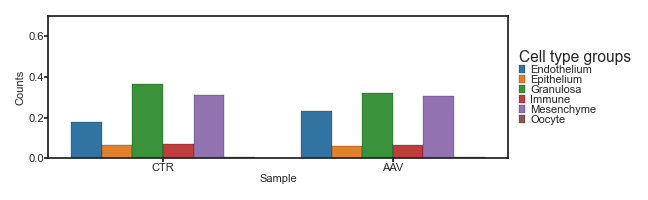

In [63]:
sc.settings.set_figure_params(dpi=80, fontsize=5, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (4.0,1.2))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.barplot(freq_table, y = "proportion", 
            x = "Sample", hue="Level0_max_pred_celltype",  dodge=True, palette="tab10", ax=ax, 
           linewidth=0.1, edgecolor="black")
ax.get_legend().remove()
plt.legend(ncol=1, prop={'size': 5}, handletextpad=0.5, markerscale = 0.6, title = "Cell type groups",
           labelspacing = 0.0, frameon = False,  title_fontsize = 7, alignment = "left", loc = 6,
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.02, 0.5))
plt.rcParams['legend.title_fontsize'] = 9
ax.set_ylim(0,0.7)
ax.set_ylabel("Counts", labelpad = 1.0)
ax.set_xlabel("Sample", labelpad = 0.5)
plt.tight_layout()
plt.savefig("./figures/all_cells_stats.pdf")

In [64]:
adata_ovary_combined.raw = adata_ovary_combined.copy()

In [65]:
adata_ovary_combined

AnnData object with n_obs × n_vars = 303411 × 16455
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'Sample', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'EN_Blood', 'EN_Lymph', 'Epithelium', 'GC_Antral', 'GC_Atretic', 'GC_CL_Active', 'GC_CL_Lytic', 'GC_Estrous', 'GC_Mitotic', 'GC_Mural', 'GC_Preantral', 'I_B_Cell', 'I_Dendritic_Cell', 'I_Granulocyte', 'I_Macrophage', 'I_T_Cell', 'M_Cortical Stroma', 'M_Dividing Mesenchyme', 'M_Immature Theca', 'M_Medullary Stroma', 'M_Pericyte', 'M_Smooth Muscle', 'M_Steroidogenic Theca', 'Oocyte', 'Level1_max_pred', 'Level1_max_pred_celltype', 'Level0_max_pred_celltype', 'Level0_Immune', 'Level0_Granulosa', 'Level0_Mesenchyme', 'Level0_Endothelium', 'Level0_Epithelium', 'Level0_Oocyte'
    var: 'gene_ids', 'feature_types', 'gen

In [66]:
# mesenchyme = adata_ovary_combined.raw.to_adata()[adata_ovary_combined.obs["Level0_max_pred_celltype"] == "Mesenchyme"]
# mesenchyme = mesenchyme[mesenchyme.obs["Level0_Mesenchyme"] > 0.8,]
mesenchyme = adata_ovary_combined[adata_ovary_combined.obs["Level1_max_pred_celltype"].isin([ "M_Smooth Muscle",
                                                                                                "M_Steroidogenic Theca",
                                                                                                "M_Medullary Stroma",
                                                                                                "M_Pericyte",
                                                                                                "M_Cortical Stroma",
                                                                                                "M_Dividing Mesenchyme",
                                                                                                "M_Immature Theca"])]
mesenchyme.shape

(112323, 16455)

In [67]:
mesenchyme.obs["Level1_max_pred_celltype"].value_counts()

Level1_max_pred_celltype
M_Steroidogenic Theca    55770
M_Smooth Muscle          23452
M_Medullary Stroma       12089
M_Pericyte                8877
M_Cortical Stroma         4699
M_Dividing Mesenchyme     4282
M_Immature Theca          3154
Name: count, dtype: int64

In [68]:
del adata_ovary_combined

normalizing counts per cell
    finished (0:00:00)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    599 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    601 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


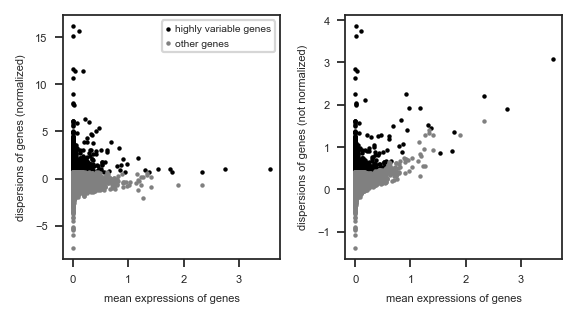

In [69]:
sc.pp.normalize_total(mesenchyme, inplace=True)
sc.pp.log1p(mesenchyme)
sc.tl.score_genes_cell_cycle(mesenchyme, s_genes=s_genes, g2m_genes=g2m_genes)
sc.pp.highly_variable_genes(mesenchyme, n_top_genes=3000)
sc.pl.highly_variable_genes(mesenchyme)

In [70]:
print(sum(mesenchyme.var.highly_variable))

3000


In [71]:
mesenchyme.raw = mesenchyme
mesenchyme = mesenchyme[:, mesenchyme.var.highly_variable]
print(mesenchyme.shape)

(112323, 3000)


regressing out ['S_score', 'G2M_score', 'total_counts']
    sparse input is densified and may lead to high memory use
    finished (0:03:11)
computing PCA
    with n_comps=50
    finished (0:01:21)


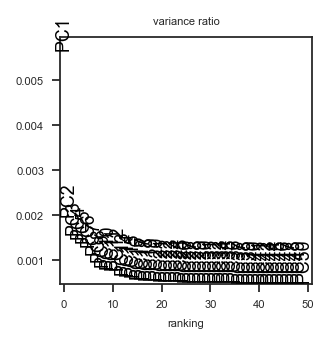

In [72]:
sc.pp.regress_out(mesenchyme, ['S_score', 'G2M_score', 'total_counts'])
sc.pp.scale(mesenchyme, 
            # max_value=10
            )
sc.pp.pca(mesenchyme, random_state= 0)
sc.pl.pca_variance_ratio(mesenchyme, n_pcs = 50)

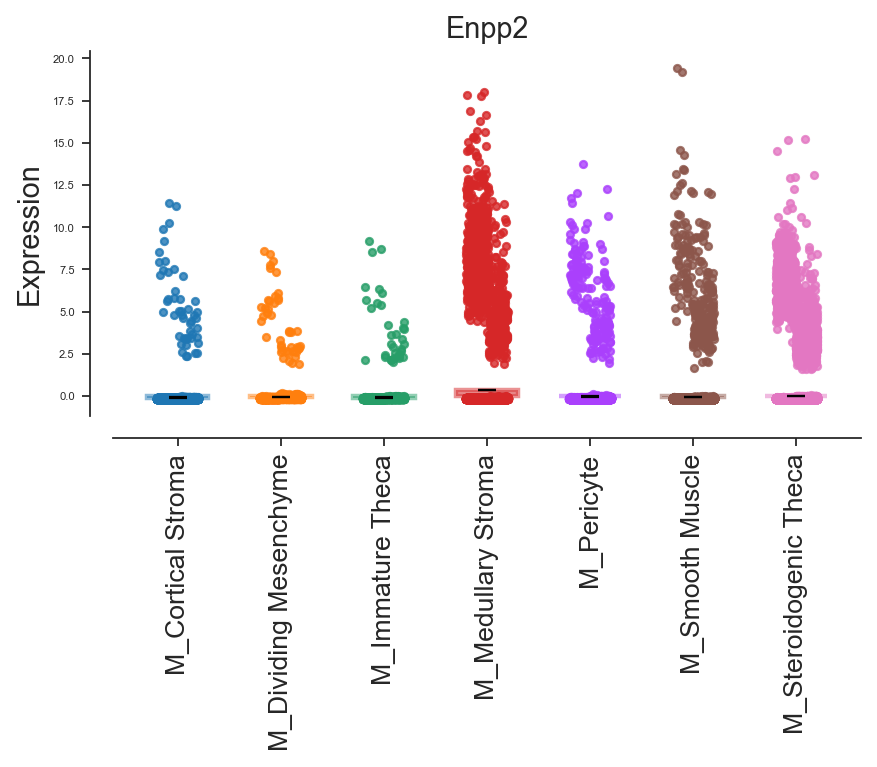

In [89]:
import omicverse as ov
fig, ax = plt.subplots(figsize=(6,3))
ov.pl.bardotplot(mesenchyme,groupby='Level1_max_pred_celltype',color='Enpp2',figsize=(2,2),
           ax=ax,
          ylabel='Expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})

# ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=2.5,
#           text_y=0.02,
#           text='$p={}$'.format(round(0.001,3)),
#           fontsize=11,fontcolor='#000000',
#              horizontalalignment='center',)

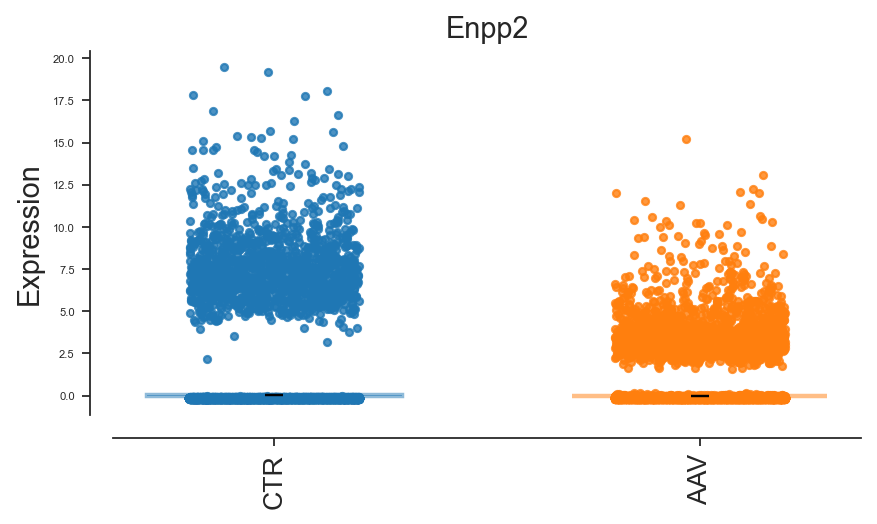

In [90]:
import omicverse as ov
fig, ax = plt.subplots(figsize=(6,3))
ov.pl.bardotplot(mesenchyme,groupby='Sample',color='Enpp2',figsize=(2,2),
           ax=ax,
          ylabel='Expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})

# ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=2.5,
#           text_y=0.02,
#           text='$p={}$'.format(round(0.001,3)),
#           fontsize=11,fontcolor='#000000',
#              horizontalalignment='center',)

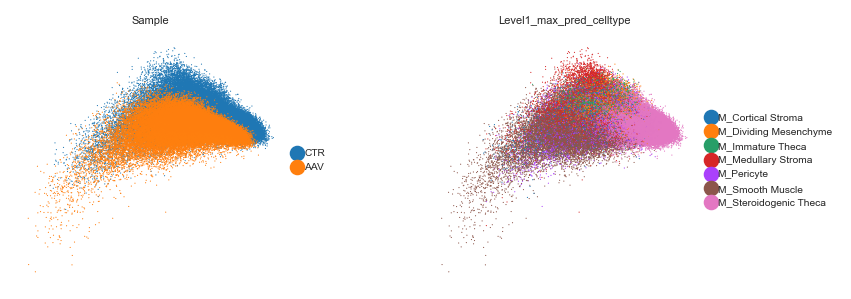

In [75]:
sc.pl.pca(mesenchyme, color = ["Sample", "Level1_max_pred_celltype"])

In [76]:
sce.pp.harmony_integrate(mesenchyme, 'Sample')

2024-09-19 23:41:59,688 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2024-09-19 23:42:07,693 - harmonypy - INFO - sklearn.KMeans initialization complete.
2024-09-19 23:42:08,077 - harmonypy - INFO - Iteration 1 of 10
2024-09-19 23:42:35,557 - harmonypy - INFO - Iteration 2 of 10
2024-09-19 23:43:03,020 - harmonypy - INFO - Iteration 3 of 10
2024-09-19 23:43:30,619 - harmonypy - INFO - Iteration 4 of 10
2024-09-19 23:43:58,797 - harmonypy - INFO - Iteration 5 of 10
2024-09-19 23:44:21,121 - harmonypy - INFO - Iteration 6 of 10
2024-09-19 23:44:34,705 - harmonypy - INFO - Iteration 7 of 10
2024-09-19 23:44:48,190 - harmonypy - INFO - Iteration 8 of 10
2024-09-19 23:44:59,230 - harmonypy - INFO - Converged after 8 iterations


In [77]:
mesenchyme.write_h5ad("./pyobjs/mesenchyme0.h5ad")

In [2]:
mesenchyme = sc.read_h5ad("./pyobjs/mesenchyme0.h5ad")

[<AxesSubplot: title={'center': 'ctr'}, xlabel='spatial1', ylabel='spatial2'>]

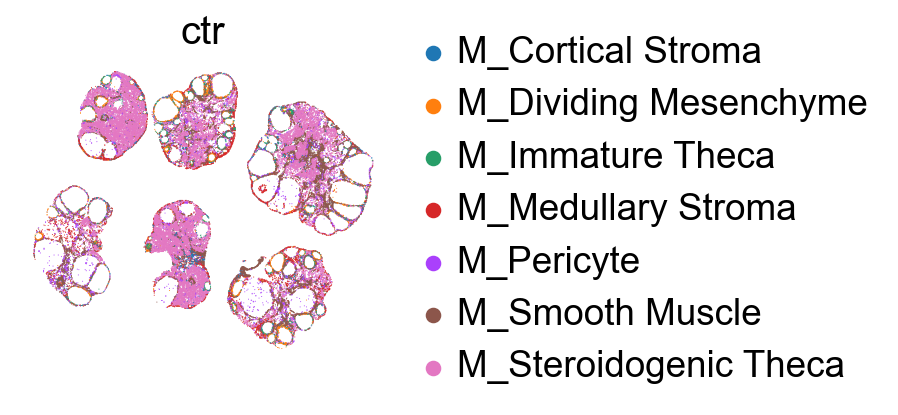

In [21]:
# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(3, 6))  # 这里定义图例保存图形尺寸


subset = mesenchyme[mesenchyme.obs["Sample"] == 'AAV']

sc.pl.spatial(subset, color=['Level1_max_pred_celltype'], 
                wspace=0.0, hspace=0.0, spot_size=30, 
                frameon=False, title="ctr", show=False, ax=ax)


In [3]:
sc.tl.rank_genes_groups(mesenchyme, 
                        groupby="Level1_max_pred_celltype", 
                        key_added="rank_gene_groups_annotation", method="wilcoxon")

In [4]:
sc.tl.dendrogram(mesenchyme, groupby="Level1_max_pred_celltype")

Original cmap N: 256
Custom palette length: 205
New cmap length: 205


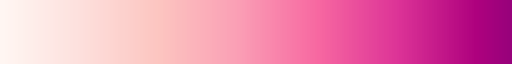

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

# 获取原始cmap
cmap = cm.get_cmap('RdPu')

# 检查原始cmap中的颜色数量
print("Original cmap N:", cmap.N)

# 创建自定义调色板
palette_custom = [mcolors.rgb2hex(cmap(i)) for i in range(1,cmap.N - 50)]
print("Custom palette length:", len(palette_custom))

# 使用自定义调色板创建新的colormap
new_cmap = mcolors.ListedColormap(palette_custom)

# 检查新的colormap的长度
print("New cmap length:", len(new_cmap.colors))

new_cmap


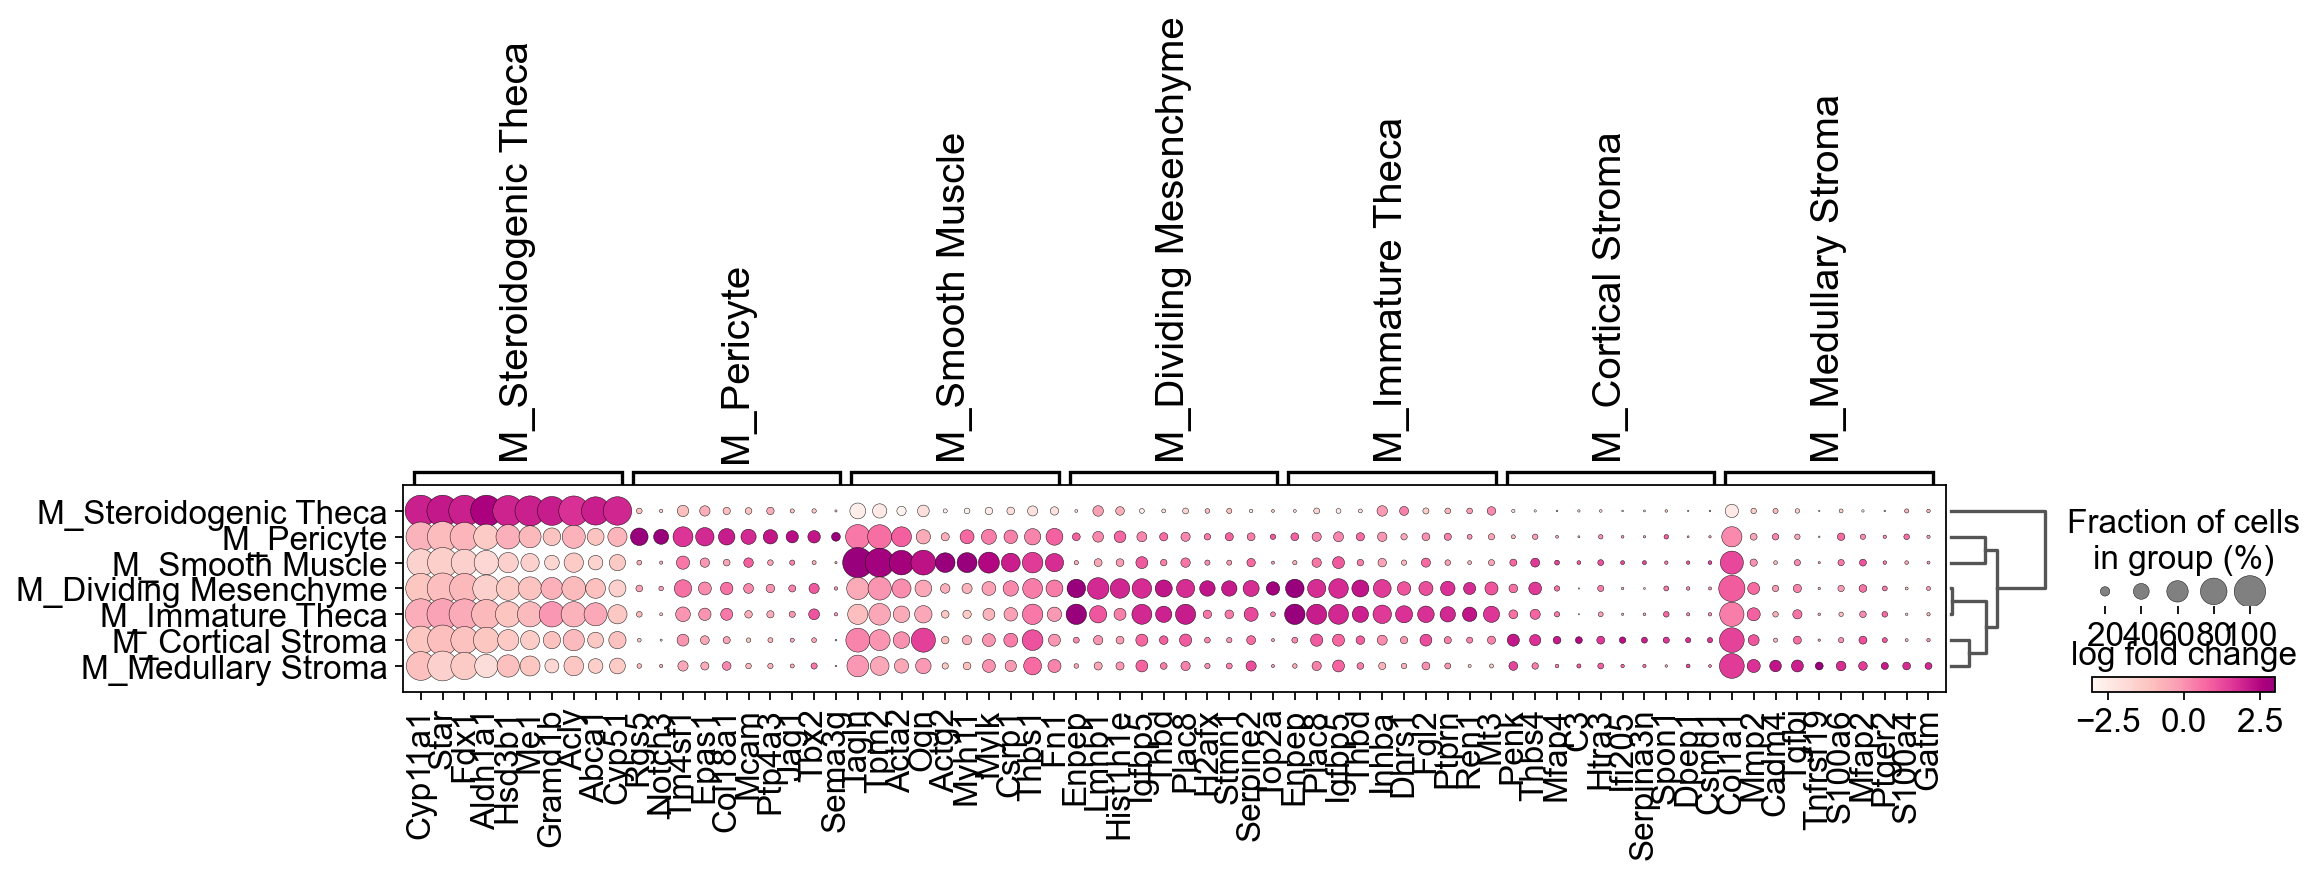

In [6]:
sc.settings.set_figure_params(dpi=80, fontsize=18, 
                              facecolor='white', frameon=True, 
                              figsize=(8, 5))
sc.pl.rank_genes_groups_dotplot(mesenchyme, n_genes=10, 
                                key="rank_gene_groups_annotation", 
                                values_to_plot='logfoldchanges', 
                                # groupby='annotation',
                                cmap=new_cmap, # bwe RdPu
                                min_logfoldchange=1.5, 
                                vmin = -3.0, vmax = 3.0, figsize = (15,1.7), 
                                save="mesenchyme_subtype_markers")
# sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

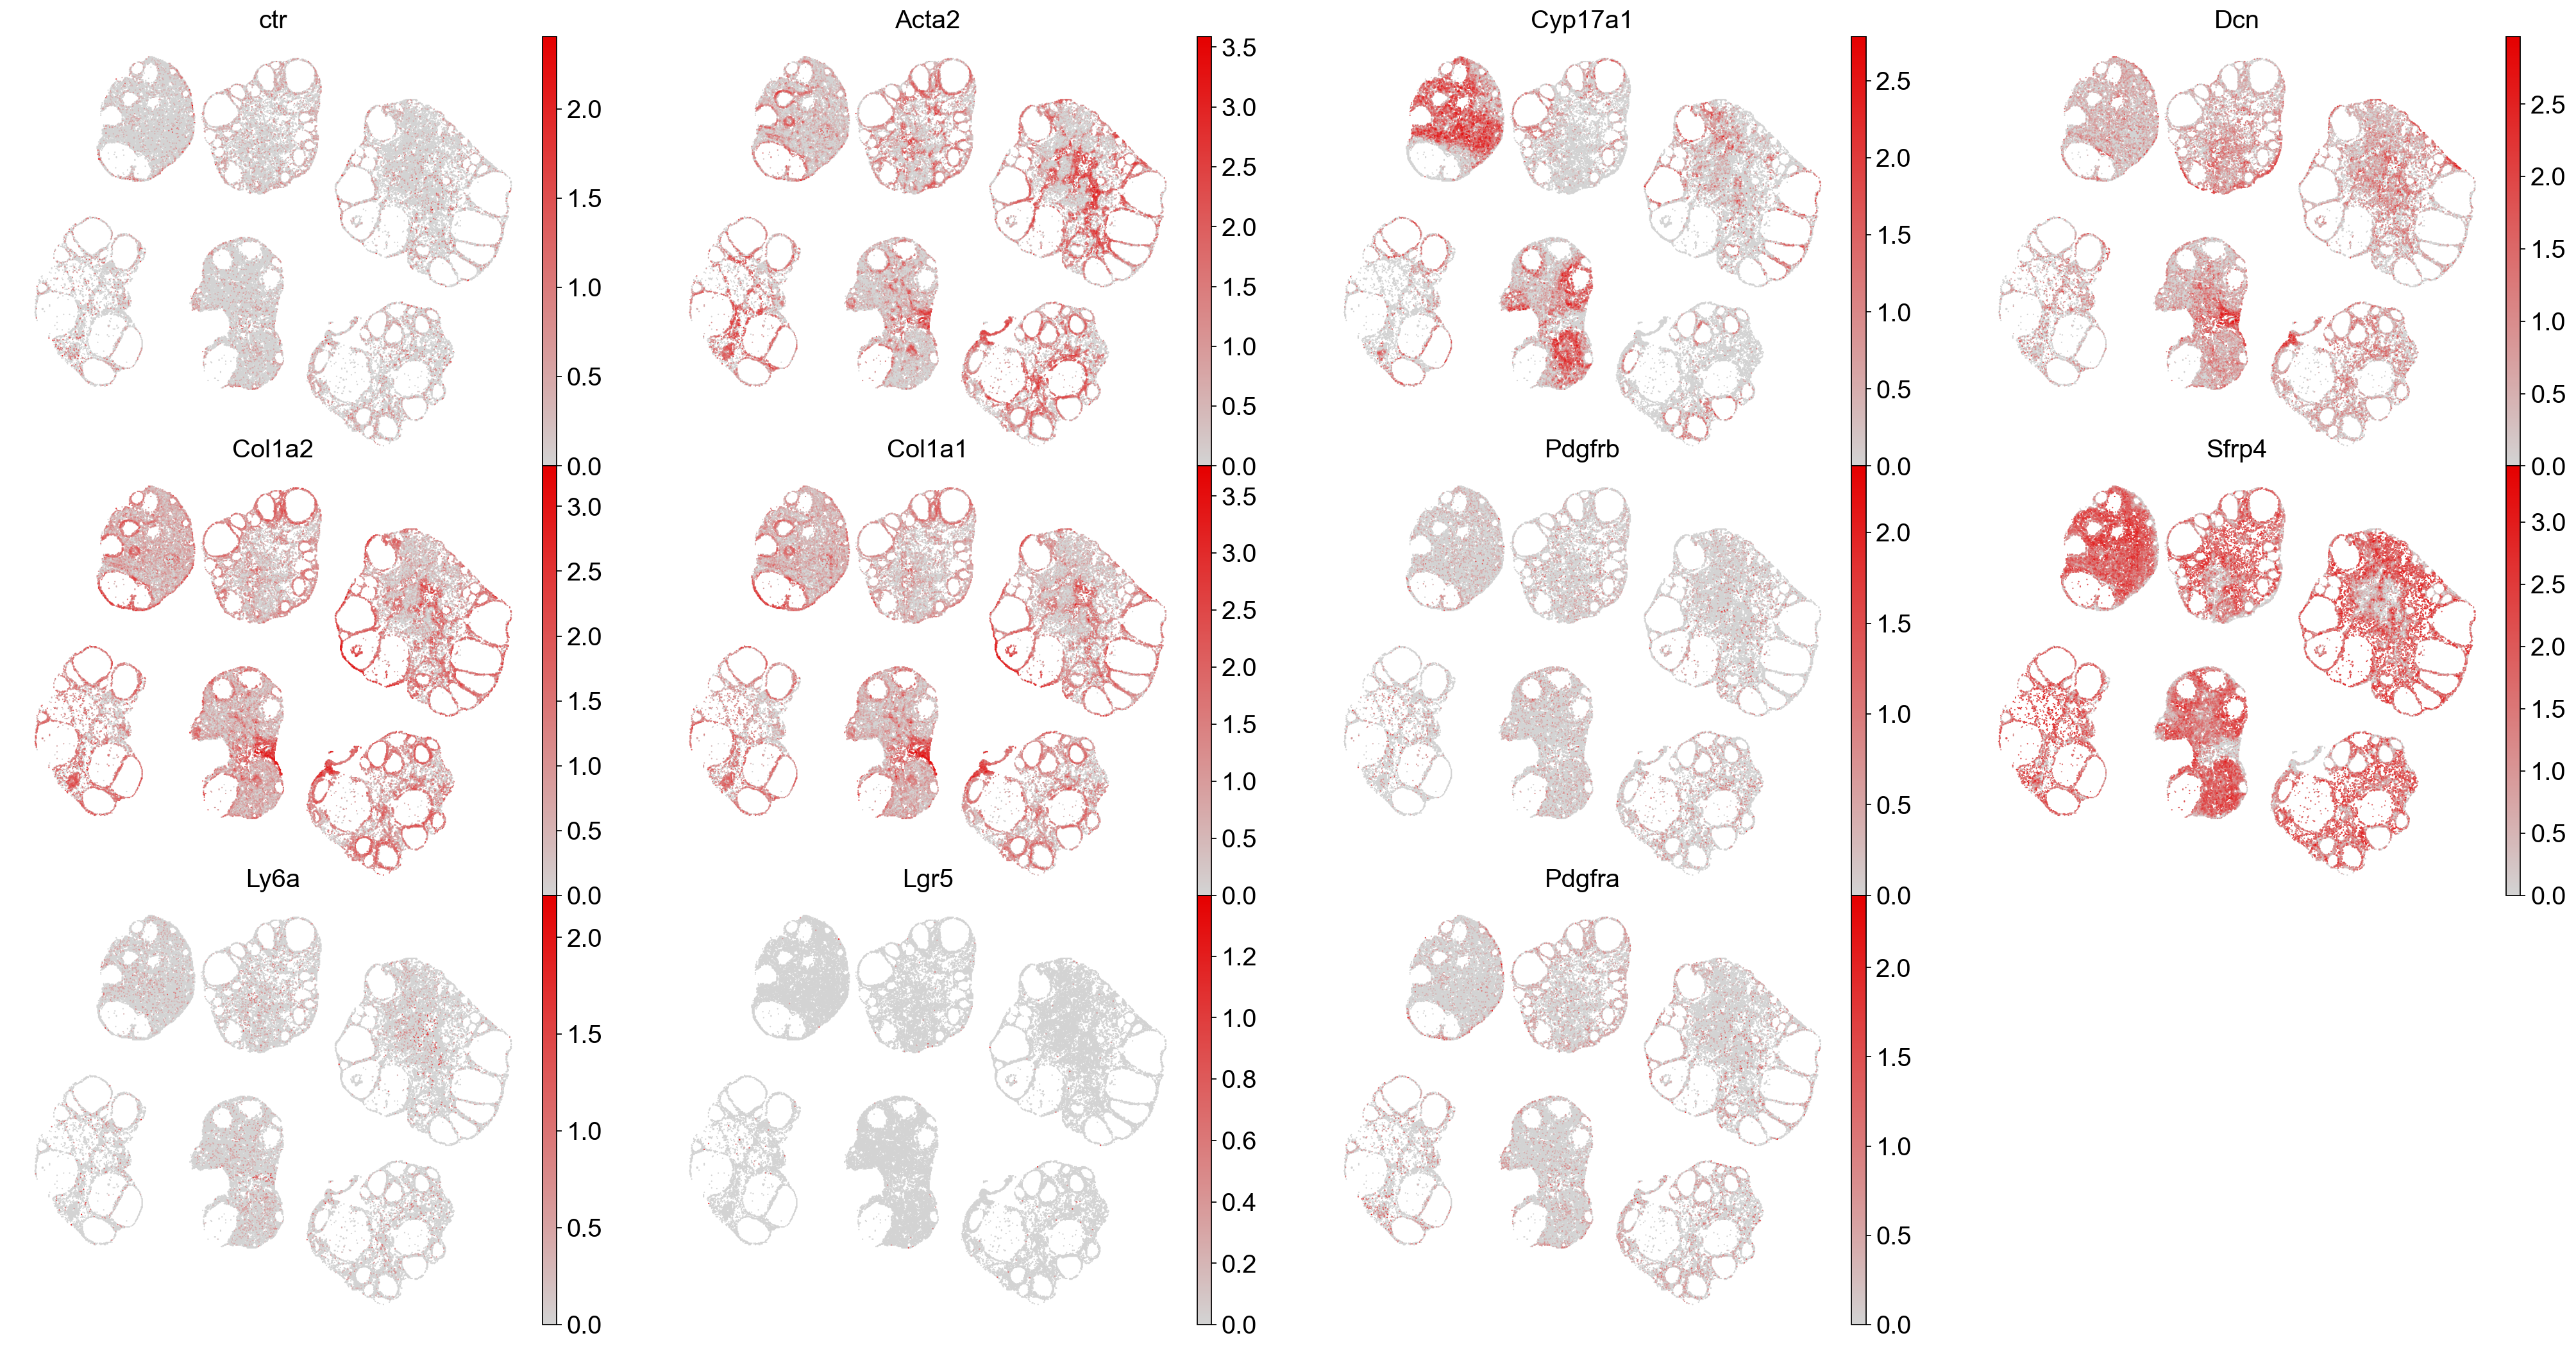

In [23]:
sc.pl.spatial(subset, color=["Pdgfra", "Acta2", "Cyp17a1",
                              "Dcn", "Col1a2", 
                             "Col1a1", "Pdgfrb", "Sfrp4",
                             "Ly6a","Lgr5","Pdgfra"], 
                wspace=0.0, hspace=0.0, spot_size=30, cmap=sns.blend_palette(["lightgray", sns.xkcd_rgb["red"]],as_cmap=True),
                frameon=False,  show=True)

In [24]:
mesenchyme.obs["Level1_max_pred_celltype"].value_counts()

Level1_max_pred_celltype
M_Steroidogenic Theca    55770
M_Smooth Muscle          23452
M_Medullary Stroma       12089
M_Pericyte                8877
M_Cortical Stroma         4699
M_Dividing Mesenchyme     4282
M_Immature Theca          3154
Name: count, dtype: int64

In [7]:
mesenchyme.obs["annotation"] = mesenchyme.obs["Level1_max_pred_celltype"]
celltypes = {'M_Steroidogenic Theca': 'Steroidogenic_stromal',
             'M_Smooth Muscle': "Smooth_Muscle",
             'M_Medullary Stroma': "Fibroblast-like_cells",
             'M_Pericyte': 'Pericyte',
             'M_Cortical Stroma': "Fibroblast-like_cells",
             'M_Dividing Mesenchyme': "Dividing_Mesenchyme",
             "M_Immature Theca":"Dividing_Mesenchyme"}
mesenchyme.obs["annotation"] = mesenchyme.obs["annotation"].map(celltypes).astype("category")

In [8]:
sc.tl.rank_genes_groups(mesenchyme, 
                        groupby="annotation", 
                        key_added="rank_gene_groups_annotation2", method="wilcoxon")
sc.tl.dendrogram(mesenchyme, groupby="annotation")

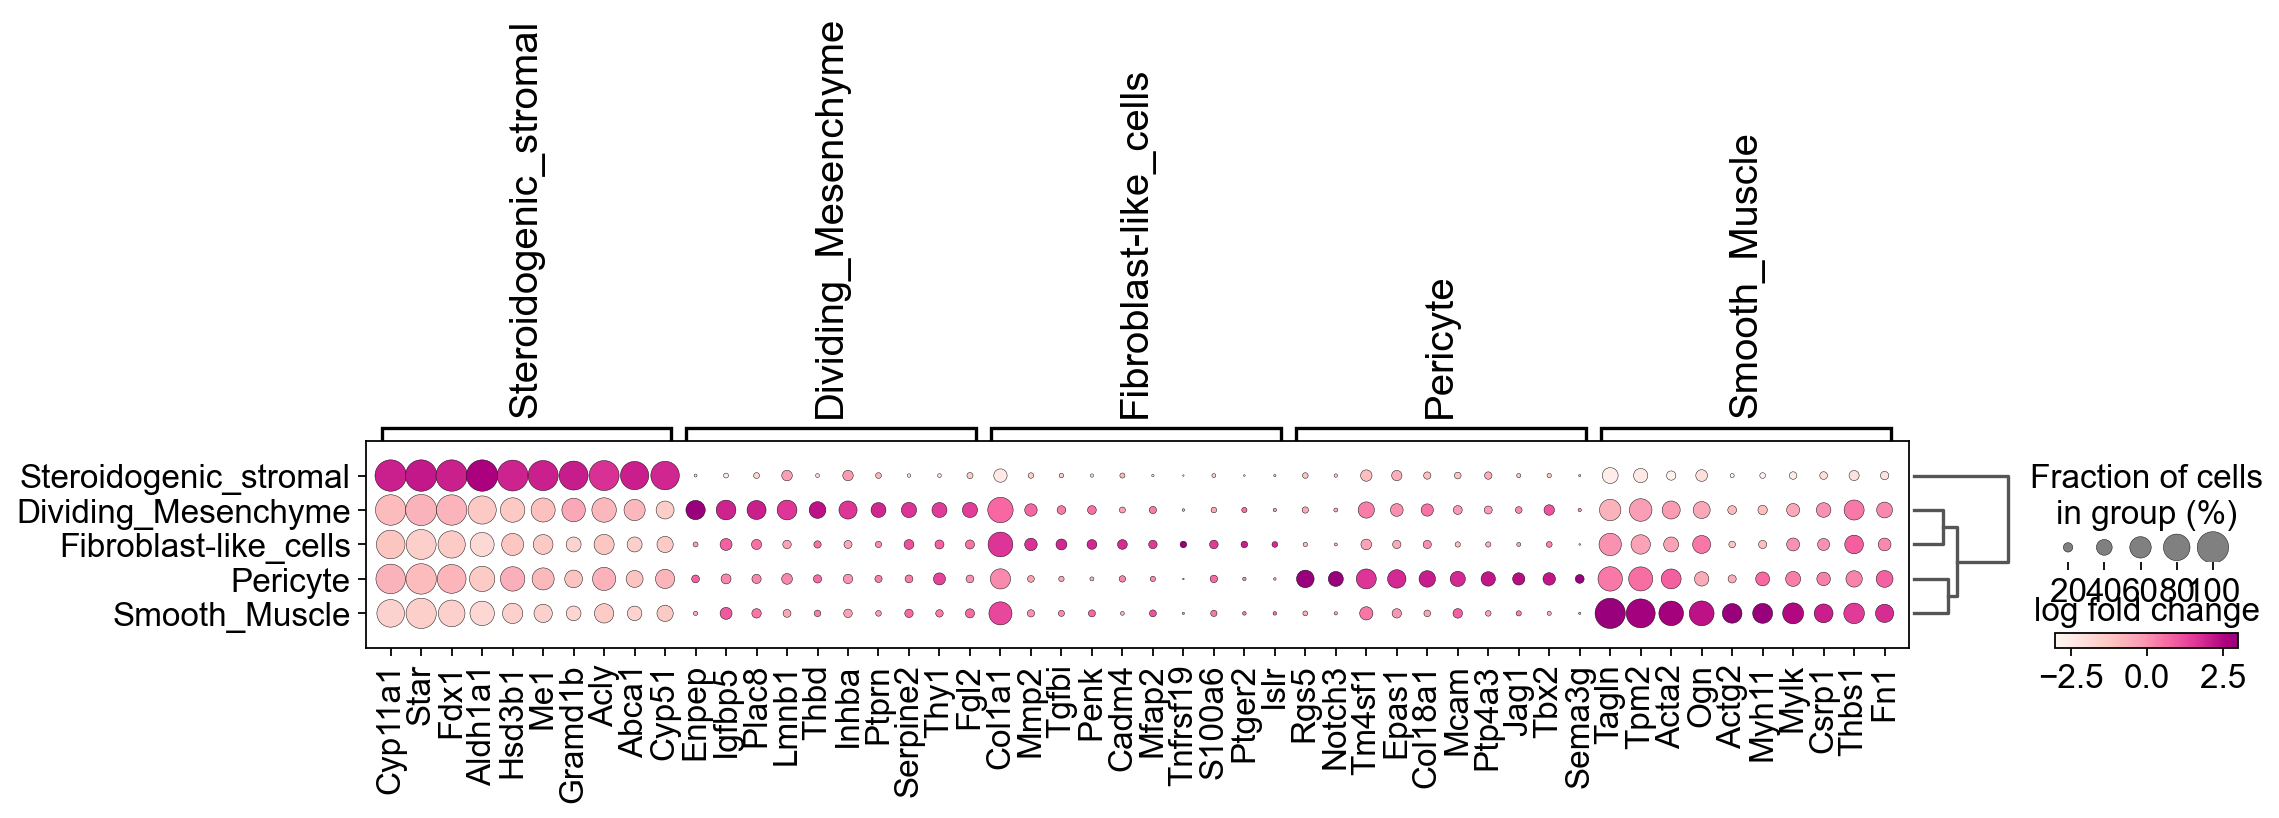

In [15]:
sc.settings.set_figure_params(dpi=80, fontsize=18, 
                              facecolor='white', frameon=True, 
                              figsize=(8, 5))
sc.pl.rank_genes_groups_dotplot(mesenchyme, n_genes=10, 
                                key="rank_gene_groups_annotation2", 
                                values_to_plot='logfoldchanges', 
                                # groupby='annotation',
                                cmap=new_cmap, min_logfoldchange=1.5, 
                                vmin = -3.0, vmax = 3.0, figsize = (15,1.7), 
                                save="mesenchyme_subtype_markers_2")
# sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

In [10]:
mesenchyme_fibro = mesenchyme[mesenchyme.obs["annotation"].isin(['Fibroblast-like_cells'])]

In [11]:
mesenchyme_fibro.obs["annotation"].value_counts()

annotation
Fibroblast-like_cells    16788
Name: count, dtype: int64

In [12]:
# 进行差异表达分析
sc.tl.rank_genes_groups(mesenchyme_fibro, groupby='Sample', method='wilcoxon')

In [13]:
# 查看结果，得到p值
result = mesenchyme_fibro.uns['rank_genes_groups']
groups = result['names'].dtype.names

# 打印每个对比组的前3个基因
for group in groups:
    print(f"Group {group}:")
    print("Gene names:", result['names'][group][:3])
    print("P-values:", result['pvals'][group][:3])
    
import pandas as pd
# 提取差异表达数据
def get_rank_genes_groups_df(adata, group):
    result = adata.uns['rank_genes_groups']
    return pd.DataFrame({
        'names': result['names'][group],
        'pvals': result['pvals'][group],
        'logfoldchanges': result['logfoldchanges'][group]
    })
    # 获取特定对比组的DataFrame

df = get_rank_genes_groups_df(mesenchyme_fibro, "AAV")


Group CTR:
Gene names: ['Eef1a1' 'Sparc' 'Col4a1']
P-values: [0. 0. 0.]
Group AAV:
Gene names: ['Tpt1' 'Fth1' 'Soat1']
P-values: [0. 0. 0.]


In [14]:

# 查找基因为 'Gpnmb' 或 'Enpp2' 的行
result = df[df['names'].isin(['Gpnmb', 'Enpp2','Mmp12','Ptgs2','Cxcl8','Vegfa','Il6'])]

# 显示结果
print(result)

       names         pvals  logfoldchanges
1081   Vegfa  6.947739e-38        0.460426
2394   Ptgs2  2.315908e-14        1.314897
5171     Il6  1.056468e-03        1.084743
6242   Gpnmb  2.578412e-02        0.966031
16010  Mmp12  7.451198e-01       -1.078936
16319  Enpp2  6.611861e-04       -1.681402


[<AxesSubplot: title={'center': 'ctr'}, xlabel='spatial1', ylabel='spatial2'>]

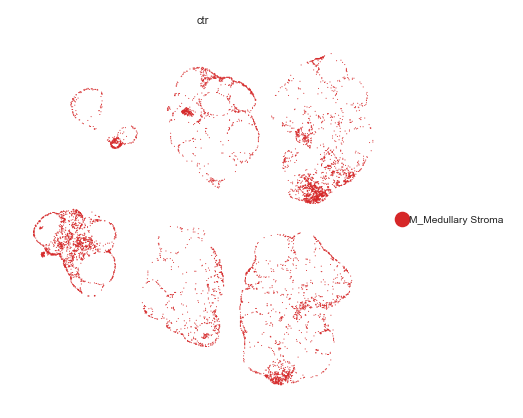

In [99]:
# 创建一个仅用于保存图例的图形
fig, ax = plt.subplots(figsize=(3, 6))  # 这里定义图例保存图形尺寸


subset = mesenchyme_medullary[mesenchyme_medullary.obs["Sample"] == 'CTR']

sc.pl.spatial(subset, color=['Level1_max_pred_celltype'], 
                wspace=0.0, hspace=0.0, spot_size=30, 
                frameon=False, title="ctr", show=False, ax=ax)


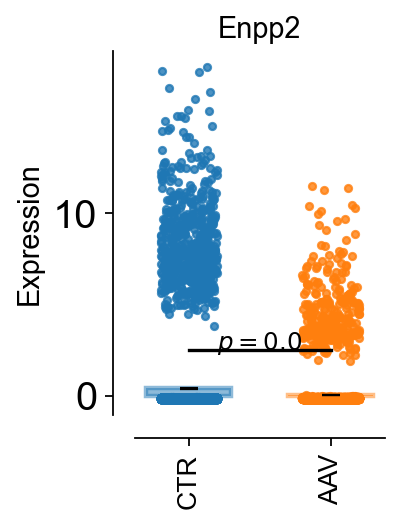

In [35]:
import omicverse as ov
fig, ax = plt.subplots(figsize=(2,3))
ov.pl.bardotplot(mesenchyme_fibro,groupby='Sample',color='Enpp2',figsize=(2,2),
           ax=ax,
          ylabel='Expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})

ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=2.5,
          text_y=0.02,
          text='$p={}$'.format(round(0.00001,3)),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center',)

In [39]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

# 假设你已有一个‘adata’对象并已经进行了基础处理，如聚类等

# 获取annotation类别
annotation_categories = mesenchyme.obs['annotation'].cat.categories

# 选择一个颜色调色板
palette = sns.color_palette("Paired", len(annotation_categories))

# Convert the palette to hex color codes using matplotlib's rgb2hex
colors = [rgb2hex(color) for color in palette]

# 添加颜色信息到adata.uns中
mesenchyme.uns['annotation_colors'] = colors

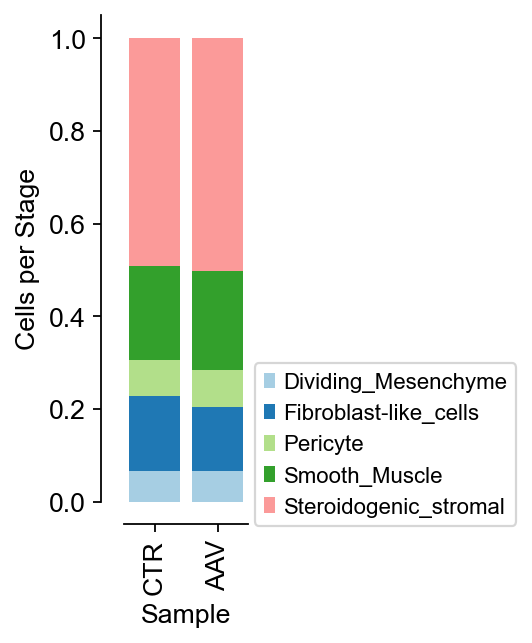

In [40]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (1,4))
ov.pl.cellproportion(adata=mesenchyme,
                     celltype_clusters='annotation',groupby_li = ["CTR","AAV"],
                    groupby='Sample',legend=True,ax=ax)

In [41]:
mesenchyme.write_h5ad("./Integrate/mesenchyme_cluster.h5ad")

In [122]:
mesenchyme.obsm["X_pca_backup"] = mesenchyme.obsm["X_pca"]
mesenchyme.obsm["X_pca"] = mesenchyme.obsm["X_pca_harmony"]
mesenchyme.obsm

AxisArrays with keys: X_pca, X_pca_harmony, means_cell_abundance_w_sf, q05_cell_abundance_w_sf, q05_cell_proportions, q95_cell_abundance_w_sf, spatial, stds_cell_abundance_w_sf, X_pca_backup

f:\anaconda\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
f:\anaconda\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


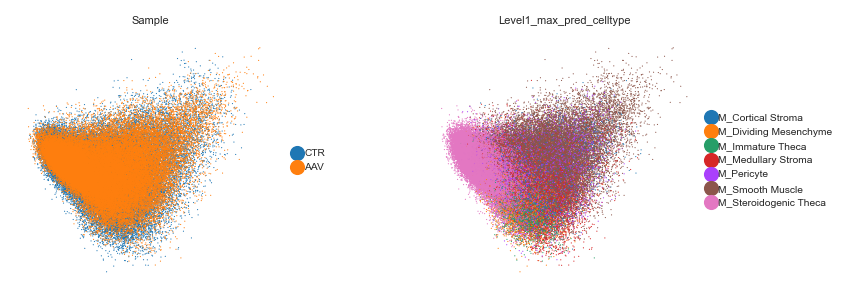

In [123]:
sc.pl.pca(mesenchyme, color = ["Sample", "Level1_max_pred_celltype"])

In [36]:
sc.pp.neighbors(mesenchyme, use_rep="X_pca_harmony", n_pcs=50, key_added="harmony_nn")
sc.tl.umap(mesenchyme, neighbors_key="harmony_nn")

computing neighbors


f:\anaconda\envs\scvi-env\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
f:\anaconda\envs\scvi-env\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
f:\anaconda\envs\scvi-env\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' ke

    finished: added to `.uns['harmony_nn']`
    `.obsp['harmony_nn_distances']`, distances for each pair of neighbors
    `.obsp['harmony_nn_connectivities']`, weighted adjacency matrix (0:00:40)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:53)


In [125]:
mesenchyme.obs["Level1_max_pred_celltype"].value_counts()

M_Steroidogenic Theca    55770
M_Smooth Muscle          23452
M_Medullary Stroma       12089
M_Pericyte                8877
M_Cortical Stroma         4699
M_Dividing Mesenchyme     4282
M_Immature Theca          3154
Name: Level1_max_pred_celltype, dtype: int64

In [126]:
freq_table = mesenchyme.obs.groupby(['Sample', 'Level1_max_pred_celltype']).size().reset_index(name='count')
# freq_table = freq_table[~freq_table["Follicle_type"].isin(["Transitioning"])]
freq_table['total_count'] = freq_table.groupby(["Sample"])['count'].transform('sum')
freq_table['proportion'] = freq_table['count'] / freq_table['total_count']
freq_table["Sample"] = freq_table["Sample"].astype("category")
freq_table["Sample"] = freq_table["Sample"].cat.reorder_categories(["CTR", "AAV"])
# freq_table["Follicle_type"] = freq_table["Follicle_type"].astype("category")
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.remove_categories(["Transitioning"])
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.reorder_categories(["Preantral", "Antral", "Atretic", "Lytic"])

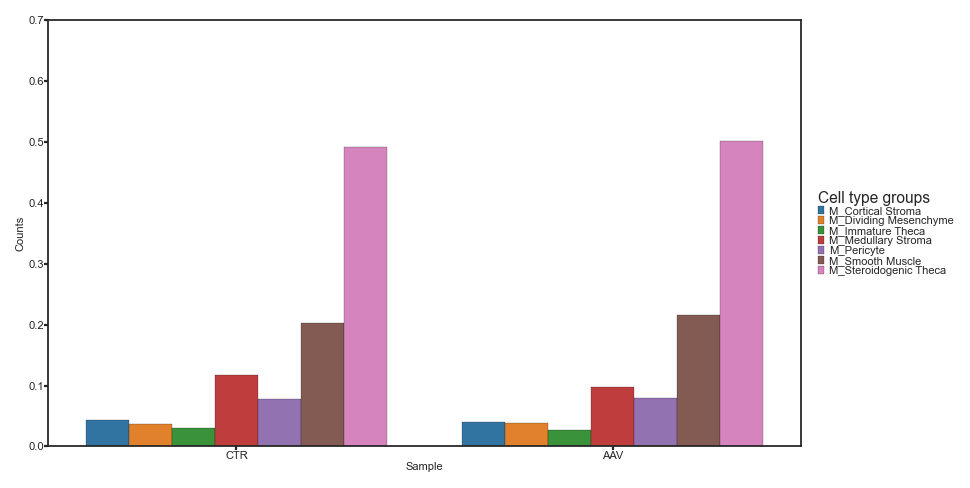

In [136]:
sc.settings.set_figure_params(dpi=80, fontsize=5, facecolor='white', frameon=False, figsize=(5.0, 5.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (6,3))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.barplot(freq_table, y = "proportion", 
            x = "Sample", hue="Level1_max_pred_celltype",  dodge=True, palette="tab10", ax=ax, 
           linewidth=0.1, edgecolor="black")
ax.get_legend().remove()
plt.legend(ncol=1, prop={'size': 5}, handletextpad=0.5, markerscale = 0.6, title = "Cell type groups",
           labelspacing = 0.0, frameon = False,  title_fontsize = 7, alignment = "left", loc = 6,
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (1.02, 0.5))
plt.rcParams['legend.title_fontsize'] = 9
ax.set_ylim(0,0.7)
ax.set_ylabel("Counts", labelpad = 1.0)
ax.set_xlabel("Sample", labelpad = 0.5)
plt.tight_layout()
plt.savefig("./figures/all_cells_stats_mesenchyme.pdf")

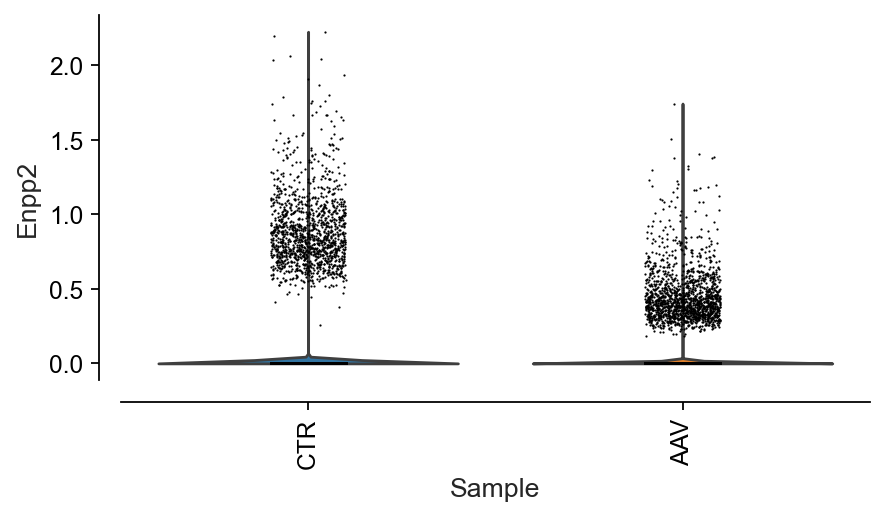

In [43]:
ov.pl.violin(mesenchyme,keys='Enpp2',groupby='Sample',figsize=(6,3))

In [49]:
mesenchyme.X.min()

-3.7263196

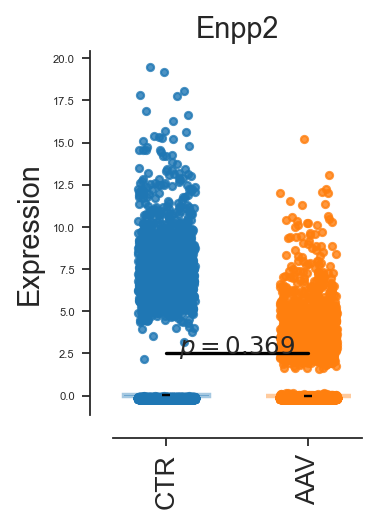

In [83]:
import omicverse as ov
fig, ax = plt.subplots(figsize=(2,3))
ov.pl.bardotplot(mesenchyme,groupby='Sample',color='Enpp2',figsize=(2,4),
           ax=ax,
          ylabel='Expression',
           bar_kwargs={'alpha':0.4,'linewidth':2,'width':0.6,'capsize':2},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})

ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=2.5,
          text_y=0.02,
          text='$p={}$'.format(round(0.369,3)),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center',)

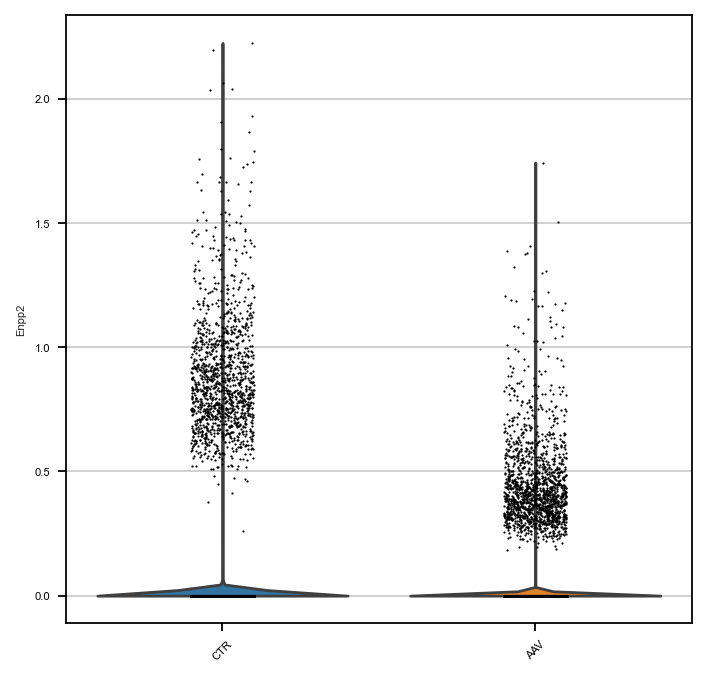

In [37]:
sc.settings.set_figure_params(dpi=80, fontsize=5, facecolor='white', frameon=False, figsize=(5.0, 5.0), vector_friendly = False, transparent=True, format="pdf")
sc.pl.violin(mesenchyme, keys="Enpp2", 
                 groupby="Sample",
                 log=False, use_raw=None, 
                 stripplot=True, jitter=True, 
                 size=1, layer=None, scale='width', 
                 order=None, multi_panel=None, xlabel='', 
                 ylabel=None, rotation=45, show=None, save=None, ax=None)

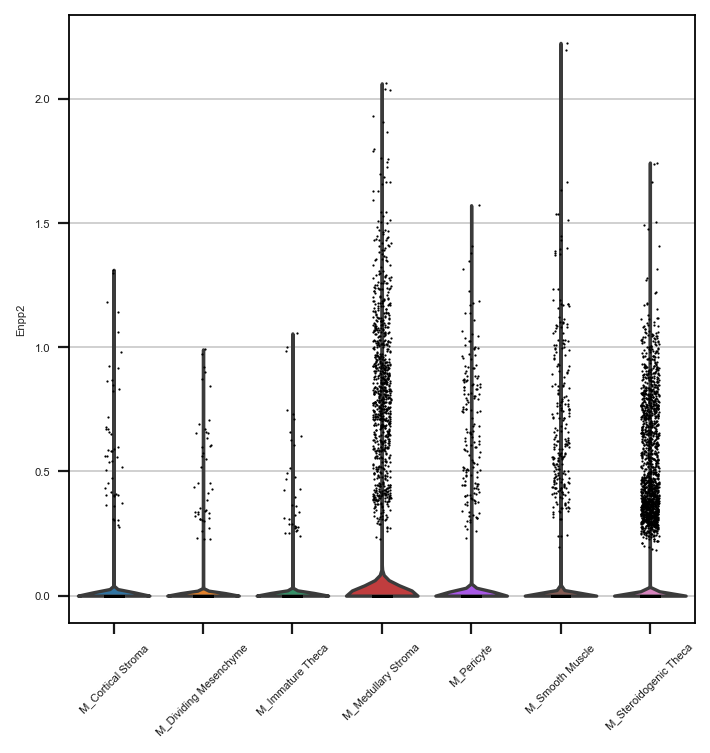

In [138]:
sc.settings.set_figure_params(dpi=80, fontsize=5, facecolor='white', frameon=False, figsize=(5.0, 5.0), vector_friendly = False, transparent=True, format="pdf")
sc.pl.violin(mesenchyme, keys="Enpp2", 
                 groupby="Level1_max_pred_celltype",
                 log=False, use_raw=None, 
                 stripplot=True, jitter=True, 
                 size=1, layer=None, scale='width', 
                 order=None, multi_panel=None, xlabel='', 
                 ylabel=None, rotation=45, show=None, save=None, ax=None)

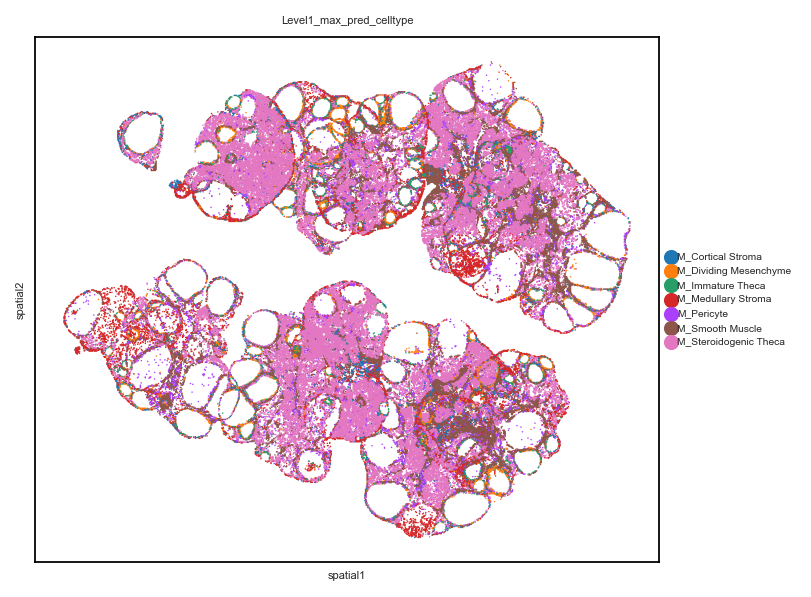

In [143]:
sc.pl.spatial(mesenchyme, color=["Level1_max_pred_celltype"], wspace=0.0,
              hspace=0.0, 
              spot_size=30, frameon=True, show=True)